# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importe de librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [3]:
# leer conjuntos de datos en los DataFrames

orders_df = pd.read_csv("instacart_orders.csv", sep=";")
products_df = pd.read_csv("products.csv", sep=";")
aisles_df = pd.read_csv("aisles.csv", sep=";")
departments_df = pd.read_csv("departments.csv", sep=";")
order_products_df = pd.read_csv("order_products.csv", sep=";")


In [4]:
# mostrar información del DataFrame

print(orders_df.head())
orders_df.info(show_counts=True)


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [5]:
# mostrar información del DataFrame

print(products_df.head())
products_df.info(show_counts=True)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# mostrar información del DataFrame
print(aisles_df.head())
aisles_df.info(show_counts=True)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
print(departments_df.head())
departments_df.info(show_counts=True)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
# mostrar información del DataFrame

print(order_products_df.head())
order_products_df.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Para el dataframe orders_df vemos que tenemos valores ausentes en la columna "days_since_prior_order" y los datos son tipo flotantes pero para este caso deberian ser del tipo entero. Para products_df tenemos valores ausentes en la columna product_name, esta columna es de tipo string con los nombres empezado con la primera letra en Mayusculas, aqui tenemos que tratar esa columna para que nos queden todos los datos en Mayusuculas o Minisculas y sea mas sencillo. En el dataframe aisles_df no hay valores ausentes en las columnas y la columna de tipo string esta toda en minusculas por lo que no es necesario tratar es columna en particular. Lo mismo pasa para el Dataframe departments_df no hay valores ausentes y la columna de tipo string no es necesario tratarla. Para el Dataframe order_products_df tenemos valores ausentes en la columna "add_to_cart_order" por lo que tendremos procesar esos datos y remplezarlos por un valor apropiado.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

1. Verificamos los valores o filas duplicadas en cada Dataframe por separado, despues hacemos un analisis para ver si factible eliminarnos.

2. Filtrar los Dataframes para confirmar si podemos eliminar los valores duplicados sin que afecten los demas datos del Dataframe.

3. Eliminar o reemplazar los valores duplicados en las columnas respectivas dependiendo de la situacion. 


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [14]:
# Revisa si hay pedidos duplicados

print(orders_df[orders_df.duplicated()])  # Usamos duplicated() para encontrar los duplicados
print()
print(orders_df["days_since_prior_order"].value_counts(dropna=False))
print()
print(orders_df.duplicated().sum())


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

days_since_prior_order
30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
NaN     28817
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: count, dtype: int64

0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Tenemos 15 filas duplicadas en la columna "days_since_prior_order", las filas duplicadas tienen en comun que todos los valores en las columnas order_dow y order_hour_of_day parecen ser los mismos, por lo tantos los valores duplicados corresponden a pedidos hechos el mismo dia y a la misma hora.

In [15]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(orders_df[(orders_df["order_hour_of_day"] == 2) & (orders_df["order_dow"] == 3)])

print(orders_df[(orders_df["order_hour_of_day"] == 2) & (orders_df["order_dow"] == 3)]["days_since_prior_order"].value_counts(dropna=False))


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
456998   3384021    14881             6          3                  2   
458801    910166   164782            18          3                  2   
459620   1680532   106435             6          3                  2   
468309    222962    54979            59          3                  2   
477511   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Vemos que tenemos 121 filas para todos pedidos que fueron hechos el Miercoles a las 2 am de los cuales 15 filas son duplicadas. En este caso podemos eliminar las filas duplicas sin afectar el resto de los datos en el Dataframe.

In [16]:
# Elimina los pedidos duplicados

orders_df = orders_df.drop_duplicates().reset_index(drop=True)

In [17]:
# Vuelve a verificar si hay filas duplicadas

print(orders_df.duplicated().sum())

0


In [18]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

print(orders_df["order_id"].duplicated().sum())


0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Algunas de las filas duplicadas tienen valores ausentes en la columna days_since_prior_order, como los pedidos fueron hechos el mismo dia y a la misma hora podemos considerar esas filas como duplicadas y eliminarlas.

### `products` data frame

In [19]:
# Verifica si hay filas totalmente duplicadas

print(products_df[products_df.duplicated()])
print()
print(products_df.duplicated().sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

0


In [20]:
# Revisa únicamente si hay ID de departamentos duplicados

print(products_df["department_id"].duplicated().sum())

49673


In [21]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products_df["product_name"] = products_df["product_name"].str.upper()
print(products_df["product_name"].head())
print(products_df["product_name"].duplicated().sum())


0                           CHOCOLATE SANDWICH COOKIES
1                                     ALL-SEASONS SALT
2                 ROBUST GOLDEN UNSWEETENED OOLONG TEA
3    SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                            GREEN CHILE ANYTIME SAUCE
Name: product_name, dtype: object
1361


In [22]:
# Revisa si hay nombres duplicados de productos no faltantes

print(products_df["product_name"].value_counts(dropna=False))
print()
print(products_df["product_name"].unique())
print()
print(products_df[~products_df["product_name"].isna()].duplicated().sum())


product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64

['CHOCOLATE SANDWICH COOKIES' 'ALL-SEASONS SALT'
 'ROBUST GOLDEN UNSWEETENED OOLONG TEA' ... 'ARTI

In [23]:
# Decidi hacer un filtro nuevo teniendo en cuenta las sugerencias.

print(products_df[(products_df["product_name"].duplicated()) & ~(products_df["product_name"].isna())])

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

In [24]:
# Mostramos la columna "product_name" y asi saber cuales son los nombres duplicados y la cantidad de nombres respectiva

print(products_df[(products_df["product_name"].duplicated()) & ~(products_df["product_name"].isna())]["product_name"])

2058                                     BIOTIN 1000 MCG
5455                    GREEN TEA WITH GINSENG AND HONEY
5558                              CREAM OF MUSHROOM SOUP
7558                           CINNAMON ROLLS WITH ICING
9037                              AMERICAN CHEESE SLICES
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 104, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Vemos que esta Dataframe no tiene filas duplicadas o valores unicos duplicados por lo que no es necesario eliminar filas en este Dataframe.

<div class="alert alert-block alert-info">
<b>

Aqui procedi con las correcciones tomando en cuenta las sugerencias. Vemos que al filtrar el dataframe con products_df[(products_df["product_name"].duplicated()) & ~(products_df["product_name"].isna())] y despues usar duplicated() llegamos a la conclusion de que no hay nombres duplicados de productos no faltantes por lo que no es necesario eliminar filas duplicadas en este dataframe

</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>

Codigo fue editado y corregido. Vemos que hay 104 nombres duplicados sin tener en cuenta los valores ausentes o nombres duplicados ausentes. Ya que no tenemos filas completamente duplicadas no es necesario eliminar filas. Los nombre duplicados son completamente normales en esta columna.

</b> <a class="tocSkip"></a>
</div>

### `departments` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas

print(departments_df.duplicated().sum())

0


In [26]:
# Revisa únicamente si hay IDs duplicadas de productos

print(departments_df["department_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aqui tampoco tenemos filas duplicadas por lo que no es necesario eliminar filas.

### `aisles` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas

print(aisles_df.duplicated().sum())

0


In [28]:
# Revisa únicamente si hay IDs duplicadas de productos

print(aisles_df["aisle_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No filas duplicadas en este Dataframe por lo que no es necesario eliminar o tratar columnas.

### `order_products` data frame

In [29]:
# Revisa si hay filas totalmente duplicadas

print(order_products_df.duplicated().sum())


0


In [30]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

print(order_products_df[order_products_df["add_to_cart_order"].isna()])
print()
print(order_products_df["add_to_cart_order"].isna().sum())
print()
print(order_products_df[~order_products_df["add_to_cart_order"].isna()].duplicated().sum())

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

836

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aqui tenemos valores ausentes en la columna add_to_cart_order como lo esperado pero el Dataframe no tiene filas completamente duplicadas por lo que no es necesario eliminar filas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [31]:
# Encuentra los valores ausentes en la columna 'product_name'

print(products_df.isna().sum())
print()
print(products_df[products_df["product_name"].isna()])

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Tenemos 1258 valores ausentes en la columna product_name como lo esperado. Al parecer los valores ausentes en esta columna se relacionan con las columnas aisle_id y department_id ya que ambas columnas presentas los mismos valores.

In [32]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(products_df[(products_df["product_name"].isna()) & (products_df["aisle_id"] == 100)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

En este caso vemos que tenemos igual numero de filas en ambos casos 1258 por lo que son el mismo numero valores ausentes incluso con el filtro. Los valores ausentes están relacionados con el pasillo con ID 100.

In [33]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

print(products_df[(products_df["product_name"].isna()) & (products_df["department_id"] == 21)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Aqui vemos que tenemos el mismo numero de filas 1258 con valores ausentes por lo tambien podemos decir que los valores estan relacionados con el departament con ID 21.

In [34]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(products_df[(products_df["product_name"].isna()) & (products_df["aisle_id"] == 100) & (products_df["department_id"] == 21)])


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Aqui obtenemos el mismo resultado es decir igual numero de filas lo que nos confirma que hay la misma cantidad de valores ausentes incluso con los datos del pasillo con ID 100 y el departamento con ID 21. En este caso, podemos decir que todos los valores ausentes de este Dataframe tienen el mismo ID para el pasillo y departamento.

In [35]:
# Completa los nombres de productos ausentes con 'Unknown'

# En este caso podemos usar el metodo where(), tambien se puede hacer con fillna() pero decidi hacerlo de forma alternativa.

products_df["product_name"] = products_df["product_name"].where(~(products_df["product_name"].isna()), "Unknown")
print(products_df["product_name"].isna().sum())



0


In [36]:
print(products_df["product_name"].value_counts(dropna=False))

product_name
Unknown                                                                 1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Como no hay forma de saber el nombre del producto reemplazamos los valores ausentes por "Unknown" ya que esta es una variable categorica.

### `orders` data frame

In [37]:
# Encuentra los valores ausentes

print(orders_df.isna().sum())
print()
print(orders_df[orders_df["days_since_prior_order"].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4              

In [38]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

print(orders_df[(orders_df["days_since_prior_order"].isna()) & ~(orders_df["order_number"]==1)])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [39]:
# En este caso decidi usar where() nuevamente para reemplazar los valores ausentes por 0 en la columna deseada. 

orders_df["days_since_prior_order"] = orders_df["days_since_prior_order"].where(~(orders_df["days_since_prior_order"].isna()), 0)
print(orders_df["days_since_prior_order"].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Vemos que tenemos *28817* valores ausentes en la columna "days_since_prior_order", para este caso hay que tener en cuenta que la columna es un tipo de dato entero y que todos los valores ausentes solo se presentan cuando order_numer es igual a 1 esto significa que todos los valores ausentes de esta columna equivalen al primer pedido de los clientes. Como es el primer pedido podemos decir que los valores de esta columan deberian ser 0.

### `order_products` data frame

In [40]:
# Encuentra los valores ausentes

print(order_products_df.isna().sum())
print()
print(order_products_df[order_products_df["add_to_cart_order"].isna()])


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print(order_products_df["add_to_cart_order"].describe())

print(order_products_df["add_to_cart_order"].min(),order_products_df["add_to_cart_order"].max())


count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      6.400000e+01
Name: add_to_cart_order, dtype: float64
1.0 64.0


Describe brevemente cuáles son tus hallazgos.

La columna "add_to_cart_order" varia en el rango de entre 1 y 64.

In [42]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

print(order_products_df[order_products_df["add_to_cart_order"].isna()]["order_id"])


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [43]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print(order_products_df[order_products_df["add_to_cart_order"].isna()].groupby("order_id")["product_id"].count().sort_values())



order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


In [44]:
# Creanos una nueva variable order_products_filter para guardar el dataframe filtrado

order_products_filter = order_products_df[order_products_df["add_to_cart_order"].isna()]["order_id"]

In [45]:
# Usamos isin() para filtrar las columnas con valores ausentes y despues agrupar el dataframe para mostrar product_id

print(order_products_df[order_products_df["order_id"].isin(order_products_filter)].groupby("order_id")["product_id"].count().sort_values())

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Los pedidos con valores ausentes en la columna "add_to_cart_order" tienen mas de 64 productos. Vemos que la cantidad de productos con valores ausentes va desde 65 hasta 127 productos dependiendo del order_id.

<div class="alert alert-block alert-info">
<b>

Decidi crear una nueva variable llamanda order_products_filter para guardar el dataframe filtrado. Luego, use el metodo isin() para filtrar las columnas con valores ausentes y despues agrupar el dataframe para mostrar product_id y aplicar count() en esa columna. 
    
Podemos ver que los pedidos con valores ausentes en la columna "add_to_cart_order" tienen mas de 64 productos y notamos que la cantidad de productos con valores ausentes va desde 65 hasta 127 productos dependiendo del order_id.

</b> <a class="tocSkip"></a>
</div>

In [46]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

# Para este caso decidi usar where() para reemplazar los valores ausentes y el astype() para convertir los flotantes a tipo entero

order_products_df["add_to_cart_order"] = order_products_df["add_to_cart_order"].where(~(order_products_df["add_to_cart_order"].isna()), 999)
order_products_df["add_to_cart_order"] = order_products_df["add_to_cart_order"].astype("int")
order_products_df.info(show_counts=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


In [48]:
print(order_products_df["add_to_cart_order"].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso al usar count() en la columna add_to_cart_order y agrupar por product_id vemos que los valores ausentes tienen menos de 64 productos y por lo tanto podemos reemplazar los valores ausentes por el numero sugerido en los comentarios del projecto. Una vez remplazados los valores ausentes verificamos que todos los datos sean enteros.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


Ya con esto finalizamos el procesamiento de datos, podemos concluir que decidimos reemplazar los valores ausentes dependiendo de los valores relevantes en las otras columnas del respectivo Dataframe. Comunmente los valores ausentes numericos son reemplazados ya sea por la media o la mediana dependiendo de las diferentes columnas que se tengan en el Dataframe pero para este caso los valores son demasiado atipicos y por lo tanto decidi usar el valor de los comentarios del projecto. Eliminamos las filas duplicados asegurandonos de que esos datos no afecten los calculos que se van a necesitar mas adelante.

Pudimos notar que algunos valores ausentes en la columna "add_to_cart_order" afectaron nuestro dataframe y por ser valores tan significativos los reemplazamos por 999 como lo sugeria los comentarios del projecto.

# Paso 3. Análisis de los datos

# [A] 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [49]:
# Aqui podemos usar describe() para verificar los valores maximos y minimos en la columna.

print(orders_df["order_hour_of_day"].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [50]:
print(orders_df["order_dow"].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


La columna "order_hour_of_day" tiene valores que osicila en el rango 0 y 23 y la columna "order_dow" entre 0 y 6 como lo esperado.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

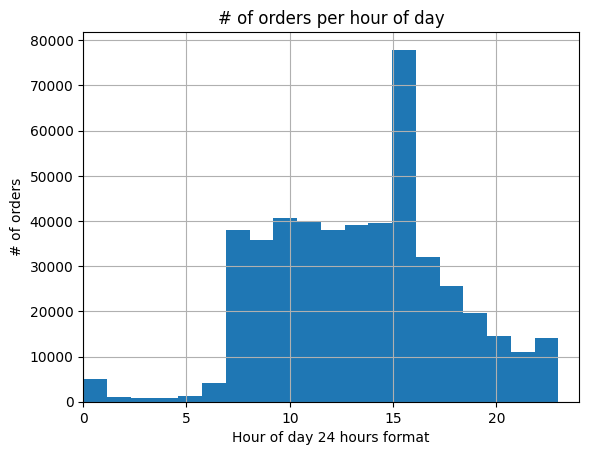

In [51]:
# Aqui decidi filtrar el Dataframe por la columna "order_hour_of_day" y aplicar plot() con kind="hist" que
# seria un histograme para mostrar las distribuciones


orders_df["order_hour_of_day"].plot(kind="hist",
                                    bins=20,
                                    title="# of orders per hour of day",
                                    grid=True,
                                    xlim=[0,24],
                                   )

plt.xlabel("Hour of day 24 hours format")
plt.ylabel("# of orders")

plt.show()

Aqui vemos que mas o menos a las 3 pm hay un un pico de pedidos por lo que la hora con mas pedidos presentados es las 3 PM, podemos decir que esa es la hora con mas pedidos y la hora con mas ventas.

### [A3] ¿Qué día de la semana compran víveres las personas?

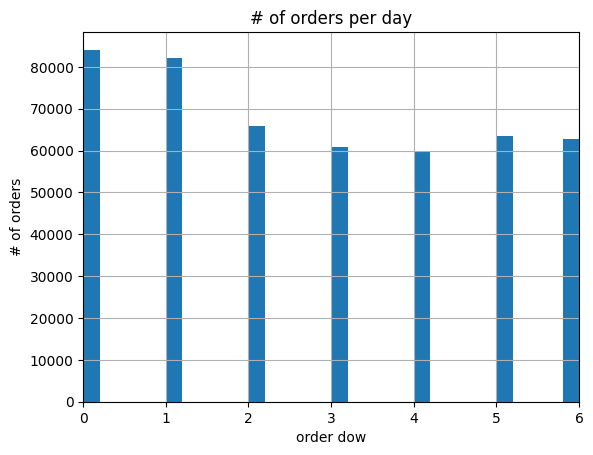

In [52]:
orders_df["order_dow"].plot(kind="hist",
                            bins=30,
                            title="# of orders per day",
                            grid=True,
                            xlim=[0,6],
                                   )

plt.xlabel("order dow")
plt.ylabel("# of orders")

plt.show()

El domingo es el dia con mas pedidos, las personas compran mas ese dia en comparacion con el resto. El domingo es un dia donde hacen mucho dinero las ventas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

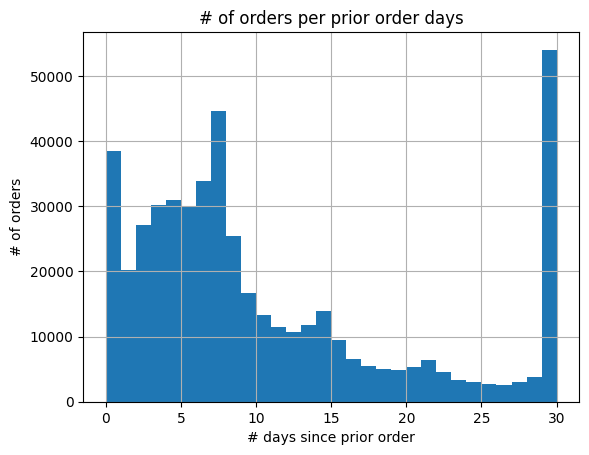

In [53]:
orders_df["days_since_prior_order"].plot(kind="hist",
                                         bins=30,
                                         title="# of orders per prior order days",
                                         grid=True,
                                         )

plt.xlabel("# days since prior order")
plt.ylabel("# of orders")

plt.show()

En este caso el numero de dias para hacer otro pedido con mas ordenes es 30 dias que es basicamente 1 mes, es decir, la cantidad de dias mas frecuente para hacer otro pedido es 1 mes. Las personas deciden esperar 1 mes para hacer otro pedido. 

# [B] 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

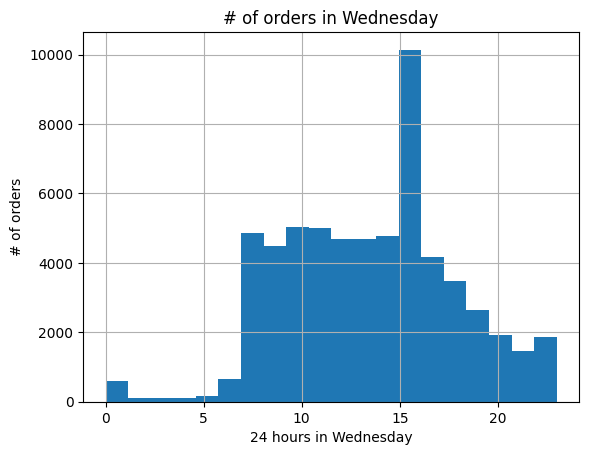

In [54]:
# Decidi usar un histrograma para el dia miercoles aplicandolo en el dataframe filtrado.
# En este caso podemos usar plot() con kind="hist"

orders_df[orders_df["order_dow"]==3]["order_hour_of_day"].plot(kind="hist",
                                                              bins=20,
                                                              title="# of orders in Wednesday",
                                                              grid=True
                                                             )

plt.xlabel("24 hours in Wednesday")
plt.ylabel("# of orders")

plt.show()

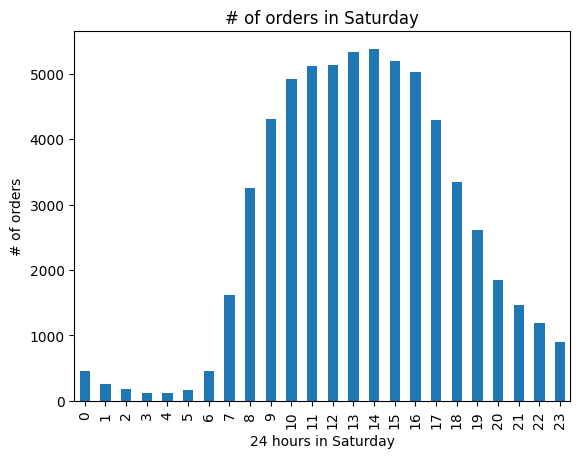

In [56]:
# Para hacerlo interesante para el Sabado decidi usar un grafico de barras que deberia dar algo similiar.
# Usamos plot() con kind="bar"

orders_df[orders_df["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index().plot(kind="bar",                                                             
                                                              title="# of orders in Saturday",
                                                              grid=False
                                                             )

plt.xlabel("24 hours in Saturday")
plt.ylabel("# of orders")

plt.show()

In [57]:
# Aqui queria mirar la matriz de correlacion que datos arrojaba pero no vi mucha relacion entra las diferentes columnas 

print(orders_df.corr())

                        order_id   user_id  order_number  order_dow  \
order_id                1.000000  0.000460     -0.001059  -0.001450   
user_id                 0.000460  1.000000     -0.003835  -0.001162   
order_number           -0.001059 -0.003835      1.000000   0.015156   
order_dow              -0.001450 -0.001162      0.015156   1.000000   
order_hour_of_day       0.000228 -0.000378     -0.033132   0.008318   
days_since_prior_order -0.000141  0.001659     -0.270195  -0.027008   

                        order_hour_of_day  days_since_prior_order  
order_id                         0.000228               -0.000141  
user_id                         -0.000378                0.001659  
order_number                    -0.033132               -0.270195  
order_dow                        0.008318               -0.027008  
order_hour_of_day                1.000000               -0.005385  
days_since_prior_order          -0.005385                1.000000  


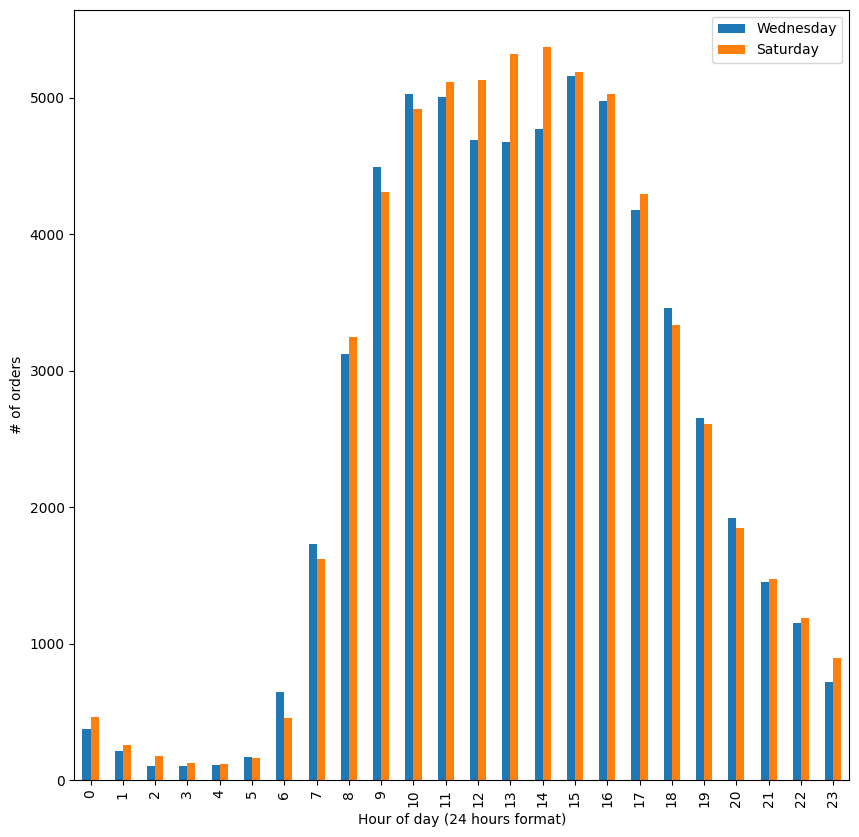

In [58]:
# Asignamos una variable nueva para el dataframe filtrado.

orders_filt = orders_df[orders_df["order_dow"].isin([3,6])]

# Podemos usar pivot_table o una tabla dinamica para crear el dataframe que necesitamos filtrar 
# con las condiciones del filtrado.

orders_filt.pivot_table(index="order_hour_of_day",columns="order_dow",values="order_id",aggfunc="count").plot(kind="bar", figsize=[10,10])

plt.xlabel("Hour of day (24 hours format)")
plt.ylabel("# of orders")
plt.legend(["Wednesday","Saturday"])

plt.show()


En este caso vemos que basicamente el periodo de mas pedidos realizados se presenta entre 2 y 3 PM pero el Sabado es el dia que mas de se vende en comparacion con el miercoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

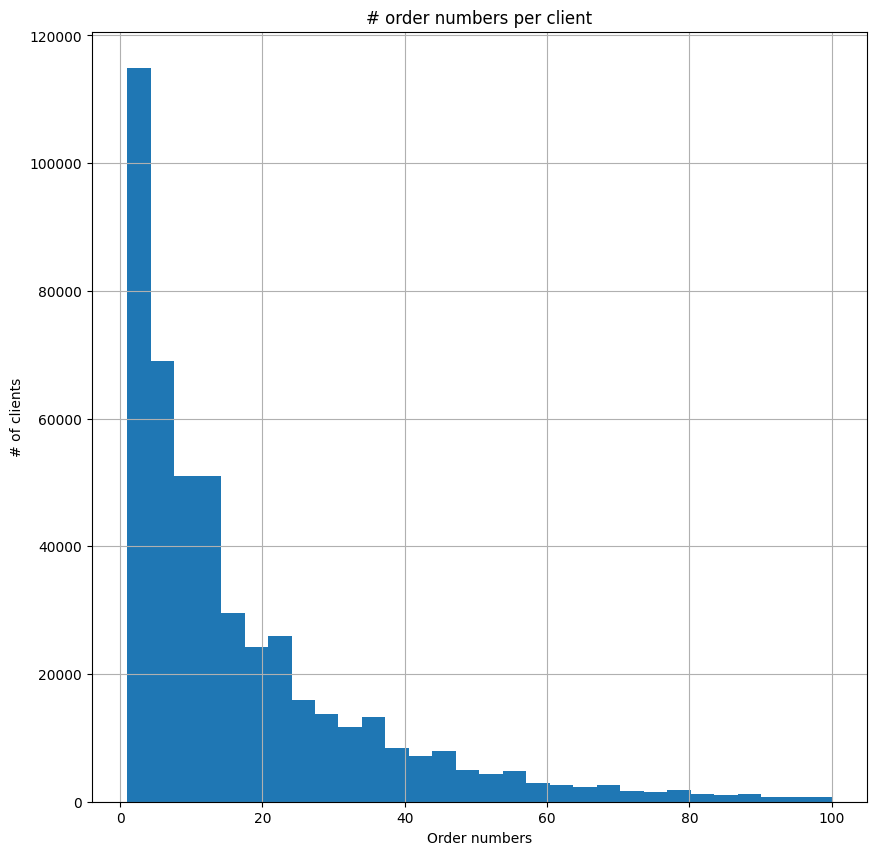

In [59]:
orders_df["order_number"].plot(kind="hist",
                               bins=30,
                               title="# order numbers per client",
                               grid=True,
                               figsize=[10,10]
                              )

plt.xlabel("Order numbers")
plt.ylabel("# of clients")

plt.show()

In [60]:
print(orders_df["order_number"])

0         11
1          5
2          4
3         56
4          2
          ..
478947     5
478948     2
478949    16
478950     3
478951    18
Name: order_number, Length: 478952, dtype: int64


En este caso vemos que los clientes tienden a hacer un solo pedido, no es muy comun que un cliente hage mas de 1 pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [61]:
# Para mostrar poder mostrar el ID y nombre tenemos que unir product_df con order_products
# En este caso decidi usar merge()

both_df = products_df.merge(order_products_df, on='product_id')
print(both_df)

         product_id                product_name  aisle_id  department_id  \
0                 1  CHOCOLATE SANDWICH COOKIES        61             19   
1                 1  CHOCOLATE SANDWICH COOKIES        61             19   
2                 1  CHOCOLATE SANDWICH COOKIES        61             19   
3                 1  CHOCOLATE SANDWICH COOKIES        61             19   
4                 1  CHOCOLATE SANDWICH COOKIES        61             19   
...             ...                         ...       ...            ...   
4545002       49694     BURRITO- STEAK & CHEESE        38              1   
4545003       49694     BURRITO- STEAK & CHEESE        38              1   
4545004       49694     BURRITO- STEAK & CHEESE        38              1   
4545005       49694     BURRITO- STEAK & CHEESE        38              1   
4545006       49694     BURRITO- STEAK & CHEESE        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [62]:
# Aqui podemos hacerlo en una sola linea de codigo
# Usamos count() y agrupamos por product_id y product_name
# Usamos head(20) para mostrar los 20 productos mas populares del resultado.

print(both_df.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False).head(20))

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


*Parece que el product_id 24852 para las Banana el el producto mas popular entre los clientes que hacen pedidos.*

# [C] 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [63]:
# Unimos los dataframes orders_df y order_products_df usando merge()

both_orders_df = orders_df.merge(order_products_df,on="order_id")
print(both_orders_df)
both_orders_df.info()

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4545002   2071924     1730            18          1                 14   
4545003   2071924     1730            18          1                 14   
4545004   2071924     1730            18          1                 14   
4545005   2071924     1730            18          1                 14   
4545006   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  
0                          30.0    

In [64]:
# Agrupamos el nuevo dataframe al que le hicimos merge y aplicamos count()

print(both_orders_df.groupby("order_id")["product_id"].count().value_counts().sort_values(ascending=False))

product_id
5      31923
6      31698
4      31054
7      30822
3      29046
       ...  
72         1
87         1
85         1
127        1
115        1
Name: count, Length: 90, dtype: int64


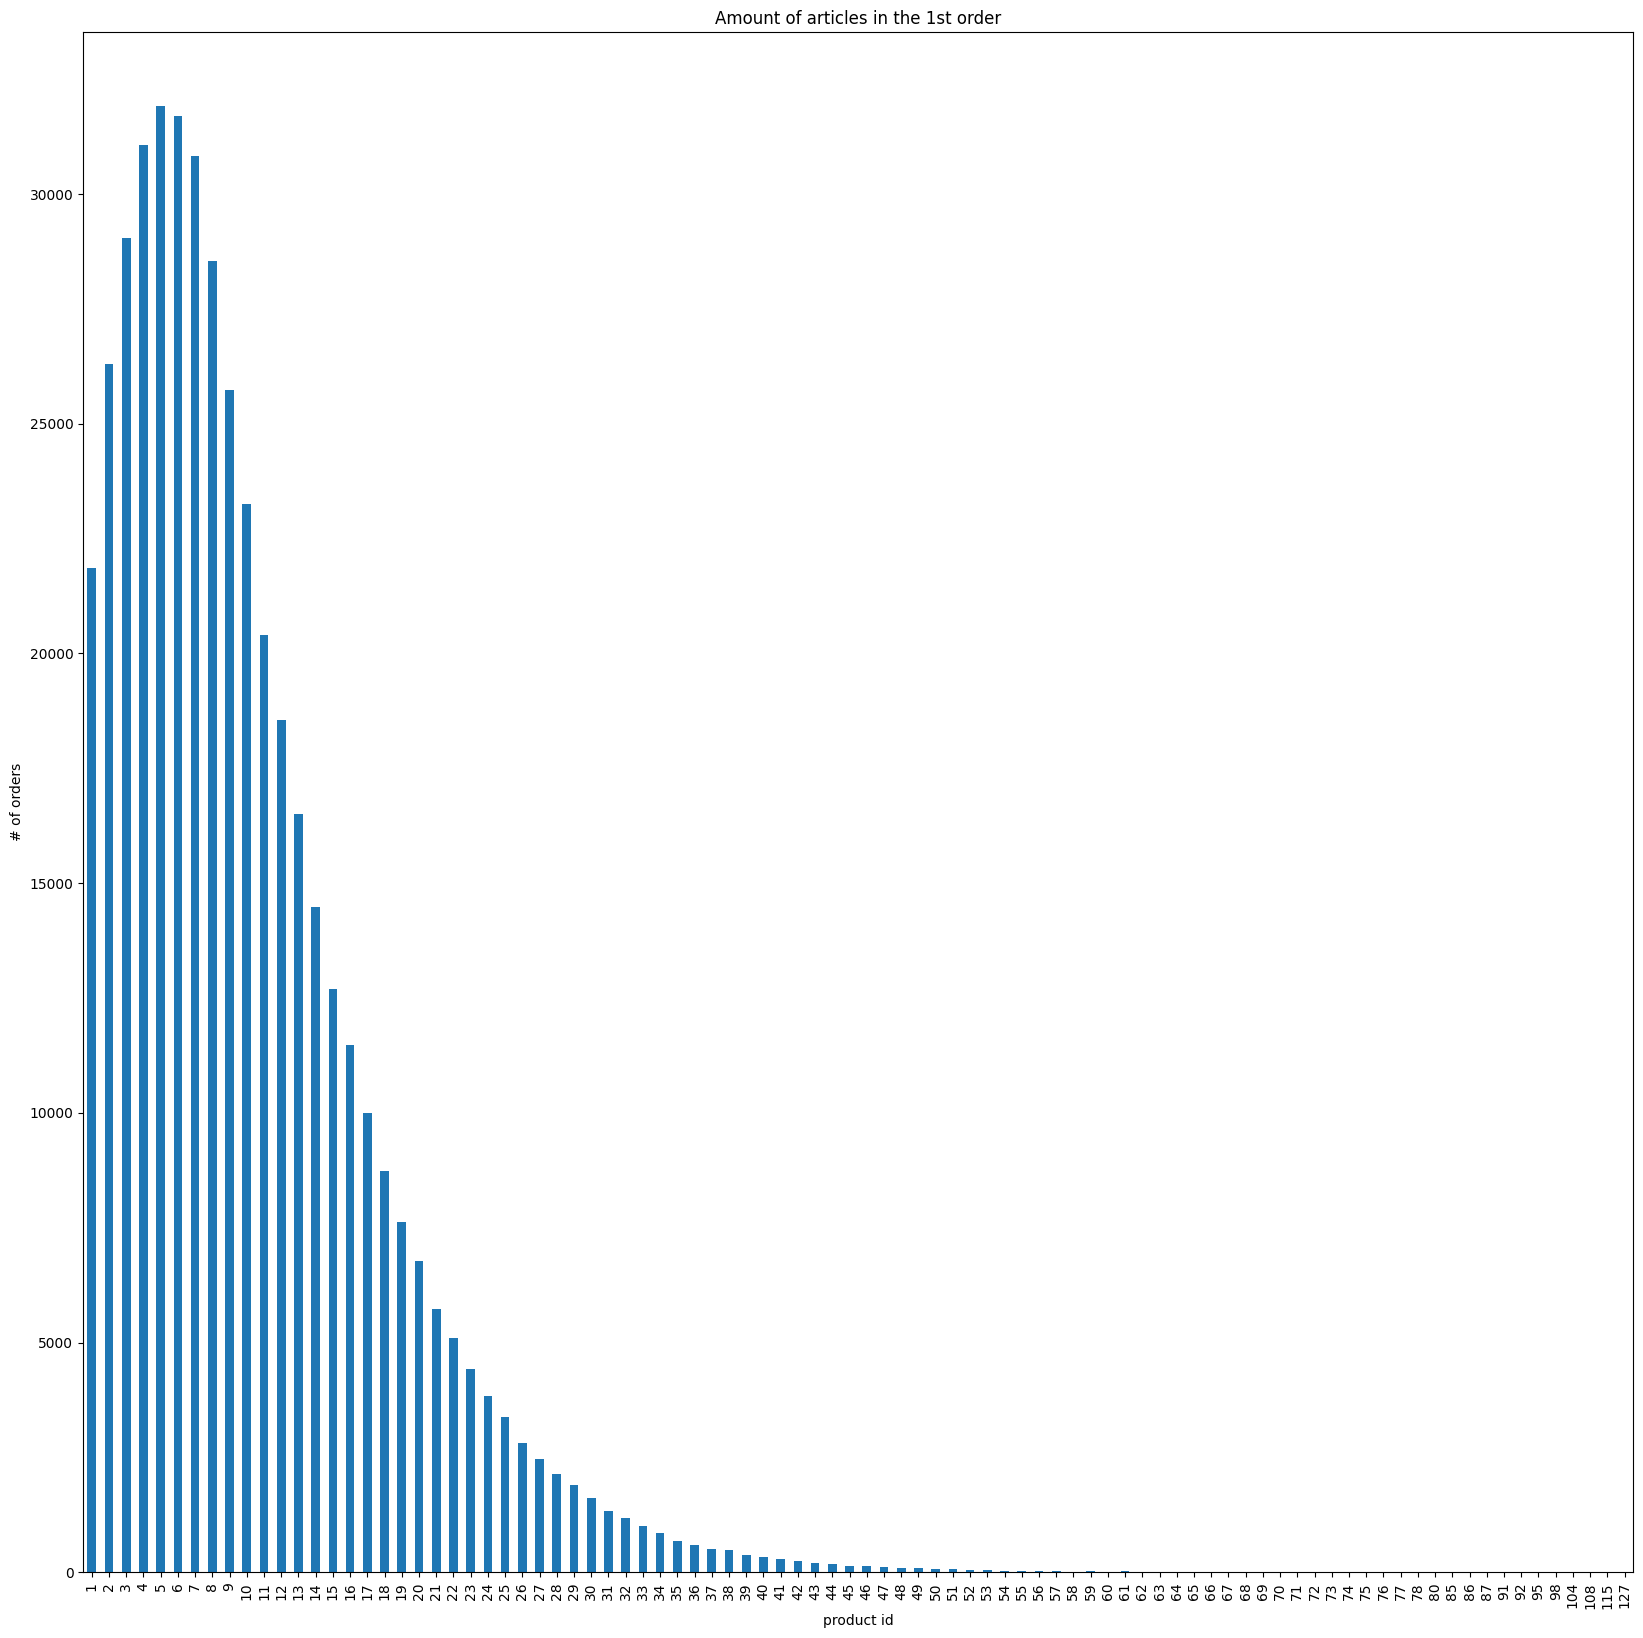

In [65]:
# Podemos graficar usando kind="bar"

both_orders_df.groupby("order_id")["product_id"].count().value_counts().sort_index().plot(kind="bar",
                                                                                          title="Amount of articles in the 1st order",
                                                                                          xlim =[0,127],
                                                                                          figsize=[20,20]
                                                                                         )

plt.xlabel("product id")
plt.ylabel("# of orders")

plt.show()

*Los clientes tienden a comprar 5 productos o articulos con mayor frecuencia en un pedido.*

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [66]:
print(both_orders_df["reordered"].describe())

count    4.545007e+06
mean     5.905025e-01
std      4.917411e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: reordered, dtype: float64


In [67]:
print(both_orders_df["order_number"].describe())
print(both_orders_df["order_number"].max())

count    4.545007e+06
mean     1.713242e+01
std      1.749958e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.400000e+01
max      9.900000e+01
Name: order_number, dtype: float64
99


In [68]:
# Aqui usamos un filtro y lo asignamos a una nueva variable

reordered_filt = both_df[both_df["reordered"] == 1]

In [69]:
# Aqui podemos hacerlo en una sola linea de codigo
# Usamos count() y agrupamos por product_id y product_name
# Usamos head(20) para mostrar los 20 productos mas populares del resultado.


print(reordered_filt.groupby(["product_name","product_id"])["order_id"].count().sort_values(ascending=False).head(20))

product_name              product_id
BANANA                    24852         55763
BAG OF ORGANIC BANANAS    13176         44450
ORGANIC STRAWBERRIES      21137         28639
ORGANIC BABY SPINACH      21903         26233
ORGANIC HASS AVOCADO      47209         23629
ORGANIC AVOCADO           47766         18743
ORGANIC WHOLE MILK        27845         16251
LARGE LEMON               47626         15044
ORGANIC RASPBERRIES       27966         14748
STRAWBERRIES              16797         13945
LIMES                     26209         13327
ORGANIC YELLOW ONION      22935         11145
ORGANIC GARLIC            24964         10411
ORGANIC ZUCCHINI          45007         10076
CUCUMBER KIRBY            49683          9538
ORGANIC FUJI APPLE        28204          8989
APPLE HONEYCRISP ORGANIC  8277           8836
ORGANIC BLUEBERRIES       39275          8799
ORGANIC LEMON             5876           8412
ORGANIC HALF & HALF       49235          8389
Name: order_id, dtype: int64


*Parece que el articulo que vuelve a pedirse con mas frecuencia es la Banana*

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [70]:
# Usamos mean() en el dataframe agrupado.

print(both_df.groupby(["product_name","product_id"])["reordered"].mean())

product_name                                                                             product_id
#2 COFFEE FILTERS                                                                        25773         0.254545
#2 CONE WHITE COFFEE FILTERS                                                             2158          0.000000
#2 MECHANICAL PENCILS                                                                    26685         0.000000
#4 NATURAL BROWN COFFEE FILTERS                                                          26381         0.358974
& GO! HAZELNUT SPREAD + PRETZEL STICKS                                                   20604         0.466667
                                                                                                         ...   
\"DARN GOOD\" CHILI MIX                                                                  10559         0.400000
\"IM PEI-NUT BUTTER\" DOUBLE CHOCOLATE COOKIE & PEANUT BUTTER ICE CREAM                  13817         0.400000
\"LO

In [71]:
print(both_df.groupby(["product_name","product_id"])["reordered"].mean().sort_values(ascending=False))

product_name                                                                product_id
PEANUT BUTTER HONEY SPREAD                                                  15657         1.0
VANILLA CREAM SELTZER                                                       38821         1.0
ORGANIC BUTTERNUT SQUASH STRAWBERRY & ACAI SQUEEZABLE VEGGIE & FRUIT SNACK  43738         1.0
SUPERFRUIT MIX JELLY BEANS                                                  27031         1.0
PEANUT BUTTER & MOLASSES HEALTHY TREATS FOR DOGS                            12560         1.0
                                                                                         ... 
CLEAR PARTY CUPS                                                            46367         0.0
CLEAR MEASURING 2 CUP WITH MEASUREMENTS                                     6512          0.0
CLEAR HAND SOAP                                                             9222          0.0
CLEAR FACE BREAK OUT FREE LIQUID LOTION SUNSCREEN SPF 30           

*Vemos que hay articulos que se tienden a pedir varias veces. Algunos productos alcanzan hasta un 100%.*

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [72]:
# Agrupamos por user_id y luego usamos mean() en la columna "reordered"


print(both_orders_df.groupby("user_id")["reordered"].mean())


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


In [73]:
print(both_orders_df.groupby("user_id")["reordered"].mean().sort_values(ascending=False))

user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64


*Esto es interesante, tenemos muy buenos clientes que vuelven a comprar el mismo producto varias veces.*

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
# Creamos una nueva variable donde gurdamos el dataframe filtrado.

add_to_cart_filter = both_df[both_df["add_to_cart_order"]==1]

In [75]:
# Agrupamos el dataframe filtrado y luego usamos count().

print(add_to_cart_filter.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False).head(20))

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

Interesante, las Banana es el primer producto más frecuente que las personas ponen en sus carritos

# Conclusiones generales del proyecto

Podemos concluir que la Banana es el producto que se ordena mas frecuente, el dia con mas pedidos es el Domingo. El Domingo es un dia con muchas ventas. Parece ser que hay un pico o hora pico para las ventas entre las 3 y 4 PM, durante estas horas tenemos un alto numero de pedidos por lo que es un lapso de tiempo a tener en cuenta. Las personas tienden a comprar de entre 5 a 6 productos por pedido. La mayoria de los clientes tiende a esperar por lo menos un mes para hacer un proximo pedido. La banana es unos de los primeros productos agregados al carrito de compras.